In [40]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [42]:
df = pd.read_csv("income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


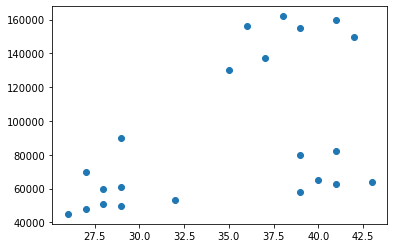

In [43]:
plt.scatter(df.Age, df["Income($)"])

In [44]:
km = KMeans(n_clusters=3)

In [45]:
y_predicted = km.fit_predict(df[["Age", "Income($)"]])
y_predicted

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2])

In [46]:
df["cluster"] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1


Text(0, 0.5, 'Income')

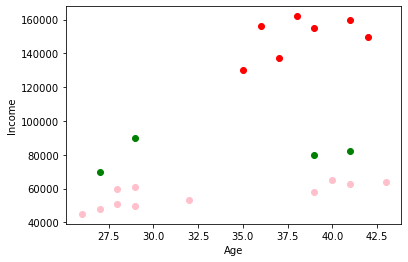

In [47]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1.Age, df1["Income($)"], color = "green")
plt.scatter(df2.Age, df2["Income($)"], color = "red")
plt.scatter(df3.Age, df3["Income($)"], color = "pink")

plt.xlabel("Age")
plt.ylabel("Income")

In [48]:
scaler = MinMaxScaler()

scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

In [54]:
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1


In [56]:
df = df.drop(["cluster"], axis = "columns")
df.head()

,Name,Age,Income($)
0,Rob,0.058824,0.213675
1,Michael,0.176471,0.384615
2,Mohan,0.176471,0.136752
3,Ismail,0.117647,0.128205
4,Kory,0.941176,0.897436


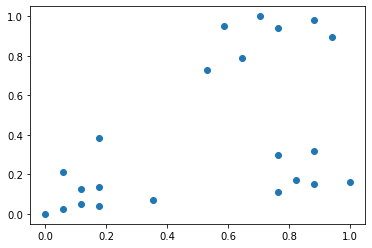

In [57]:
plt.scatter(df.Age, df["Income($)"])

In [58]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[["Age", "Income($)"]])
y_predicted

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [59]:
df["cluster"] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


In [61]:
km.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

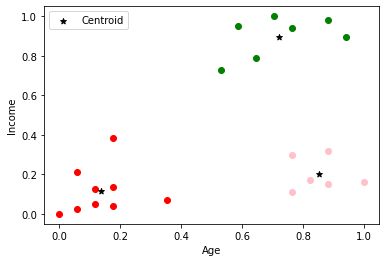

In [63]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1.Age, df1["Income($)"], color = "green")
plt.scatter(df2.Age, df2["Income($)"], color = "red")
plt.scatter(df3.Age, df3["Income($)"], color = "pink")
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], marker = '*', color ="black", label = "Centroid" )

plt.xlabel("Age"),
plt.ylabel("Income")
plt.legend()

In [64]:
k_rnge = range(1, 10)
sse = []

for k in k_rnge:
    km = KMeans(n_clusters=k)
    km.fit(df[["Age", "Income($)"]])
    sse.append(km.inertia_)

In [65]:
sse

[5.434011511988179,
 2.091136388699078,
 0.4750783498553097,
 0.3491047094419566,
 0.2621792762345213,
 0.22407006551788158,
 0.18281784627753636,
 0.13265419827245162,
 0.10383752586603562]

Text(0, 0.5, 'Sum of Squared Errors')

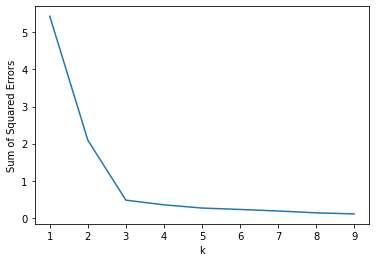

In [68]:
plt.plot(k_rnge, sse)
plt.xlabel("k")
plt.ylabel("Sum of Squared Errors")